# Discriminibility Code and Testing in Python

### Availability:
The scripts explored in this notebook are available in a pypi egg package. Simply use `sudo easy_install py_disc` to get it, then import with `from py_disc.disc import D, naive_D`

### Pseudocode
![image](disc.png)

### Real Code

In [5]:
import numpy as np
import pandas as pd
import timeit
from py_disc.disc import D, naive_D

### Experiment 1 design
We will use the following data and metric

In [6]:
d = np.array([[1], [2], [1], [1]])
subjects = np.array(['A', 'A', 'B', 'B'])
df = pd.DataFrame(data = d, index = subjects)
df.index.name = 'Subject'
df.columns = ['Value']
print 'Experiment 1 Data'
df

Experiment 1 Data


,Value
Subject,
A,1
A,2
B,1
B,1


Simple experiment metric:
$
\delta(x, y) = \vert x - y \vert
$

Expected answer is 0.25.

### Experiment 2 design

In [7]:
print 'Optimized Algorithm'
%timeit disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
print info
print
print 'Discriminibility:', disc
print '___________________________________________________________'
print
print 'Naive Algorithm'
%timeit disc, info = naive_D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
disc, info = naive_D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
print info
print
print 'Discriminibility:', disc

Optimized Algorithm
1000 loops, best of 3: 474 µs per loop
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                      0.0
1       A     1           0                      0.0
2       B     0           1                      0.5
3       B     1           0                      0.5

Discriminibility: 0.25
___________________________________________________________

Naive Algorithm
1000 loops, best of 3: 479 µs per loop
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                      0.0
1       A     1           0                      0.0
2       B     0           1                      0.5
3       B     1           0                      0.5

Discriminibility: 0.25


### Experiment 2 Design
We will place points on a plane as follows:

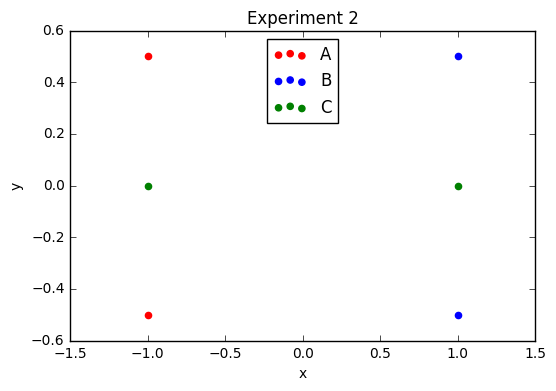

In [8]:
import matplotlib.pyplot as plt
d = np.array([[-1, .5], [-1, -.5], [1, .5], [1, -.5], [-1, 0], [1, 0]])
subjects = np.array(['A', 'A', 'B', 'B', 'C', 'C'])
plt.scatter(d[subjects == 'A'][:, 0], d[subjects == 'A'][:, 1],
            color = 'red', label = 'A')
plt.scatter(d[subjects == 'B'][:, 0], d[subjects == 'B'][:, 1],
            color = 'blue', label = 'B')
plt.scatter(d[subjects == 'C'][:, 0], d[subjects == 'C'][:, 1],
            color = 'green', label = 'C')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Experiment 2')
plt.legend(loc='upper center')
plt.show()

The metric we will use is the $l_2$ norm e.g. $\delta(\vec{x}, \vec{y}) = \vert\vert \vec{x} - \vec{y} \vert\vert_{2}^{2}$

We expect the answer to be $\frac{2}{3}$

### Experiment 2 Test

In [9]:
print 'Optimized Algorithm'
%timeit disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
print 'Discriminibility:', disc
print info
print '_______________________________________________________________'
print
print 'Naive Algorithm'
% timeit disc2, info = naive_D(d, subjects, lambda x, y: np.linalg.norm(x - y))
disc2, info = naive_D(d, subjects, lambda x, y: np.linalg.norm(x - y))
print 'Discriminibility', disc2
print info


Optimized Algorithm
1000 loops, best of 3: 745 µs per loop
Discriminibility: 0.666666666667
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                     0.75
1       A     1           0                     0.75
2       B     0           1                     0.75
3       B     1           0                     0.75
4       C     0           1                      0.5
5       C     1           0                      0.5
_______________________________________________________________

Naive Algorithm
1000 loops, best of 3: 744 µs per loop
Discriminibility 0.666666666667
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                     0.75
1       A     1           0                     0.75
2       B     0           1                     0.75
3       B     1           0                     0.75
4       C     0           1                      0.5
5       C     1           0                      0.5


### Experiment 3 Design

In [79]:
import seaborn as sns
n = 1000
d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
subjects = np.array(['A'] * n + ['B'] * n)
df = pd.DataFrame.from_dict({'Trial': d, 'Subject': subjects})

eg., we take n samples of a random variable $A \sim uni(0, 2)$ and n of a random variable $B \sim uni(1, 3)$.

We can figure out what the true answer should be using monte carlo with the samples $A \sim uni(0, 2), B \sim uni(0, 2), C \sim uni(1, 3)$
We can use monte carlo to figure out what should be $P(\vert A - B \vert < \vert A - C \vert$

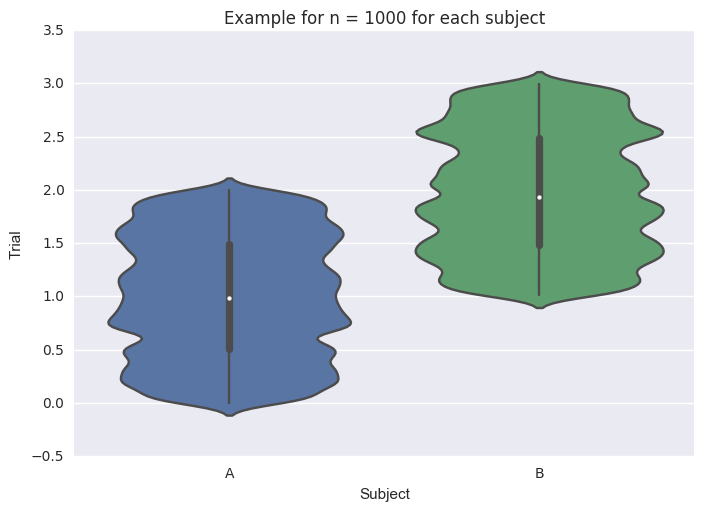

Answer should be:  0.676717


In [80]:
sns.violinplot(x = 'Subject', y = 'Trial', data = df, split = True, bw = .1)
plt.title("Example for n = 1000 for each subject")
plt.show()
print 'Answer should be: ',
a = np.random.uniform(0, 2, 1000000)
b = np.random.uniform(0, 2, 1000000)
c = np.random.uniform(1, 3, 1000000)
ans = np.mean(np.abs(a - b) < np.abs(a - c))
print ans

### Experiment 3 test - 100 experiments of 2 subjects with 15 trials

Naive Algorithm Time
100 loops, best of 3: 17.9 ms per loop

Optimized Algorithm Time
100 loops, best of 3: 34.6 ms per loop


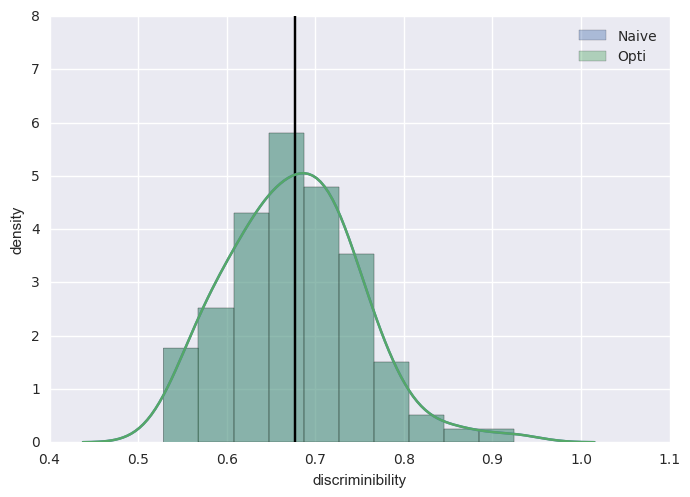

In [103]:
n = 15
print 'Naive Algorithm Time'
d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
subjects = np.array(['A'] * n + ['B'] * n)
%timeit -n 100 disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
print
print 'Optimized Algorithm Time'
d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
subjects = np.array(['A'] * n + ['B'] * n)
%timeit -n 100 disc, info = naive_D(d, subjects, lambda x, y: np.linalg.norm(x - y))
results_naive = []
results_opti = []
for i in range(100):
    d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
    subjects = np.array(['A'] * n + ['B'] * n)
    disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    results_opti.append(disc)
    disc, info = naive_D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    results_naive.append(disc)
sns.distplot(results_naive, label='Naive')
sns.distplot(results_opti, label='Opti')
plt.vlines(ans, 0, 8)
plt.xlabel('discriminibility')
plt.ylabel('density')
plt.legend()
plt.show()

### Complexity
The naive implementation should be $O(S^2T^3)$ where $S$ is the number of subjects and $T$ is the number of trials. We claim that the second implementation is better since it is $)(S^2T^2)$.
We will now show this to be true empirically.

In [90]:
for n in np.arange(10, 200, 10):
    print 'Optimized Algorithm Time,', n, 'Trials'
    d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
    subjects = np.array(['A'] * n + ['B'] * n)
    %timeit disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    print
    print 'Naive Algorithm Time,', n, 'Trials'
    d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
    subjects = np.array(['A'] * n + ['B'] * n)
    %timeit disc, info = naive_D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    print 
    print '____________________________________________________________________'

Optimized Algorithm Time, 10 Trials
100 loops, best of 3: 7.56 ms per loop

Naive Algorithm Time, 10 Trials
100 loops, best of 3: 12 ms per loop

____________________________________________________________________
Optimized Algorithm Time, 20 Trials
10 loops, best of 3: 33.1 ms per loop

Naive Algorithm Time, 20 Trials
10 loops, best of 3: 74.3 ms per loop

____________________________________________________________________
Optimized Algorithm Time, 30 Trials
10 loops, best of 3: 81.8 ms per loop

Naive Algorithm Time, 30 Trials
1 loop, best of 3: 239 ms per loop

____________________________________________________________________
Optimized Algorithm Time, 40 Trials
10 loops, best of 3: 166 ms per loop

Naive Algorithm Time, 40 Trials
1 loop, best of 3: 510 ms per loop

____________________________________________________________________
Optimized Algorithm Time, 50 Trials
1 loop, best of 3: 280 ms per loop

Naive Algorithm Time, 50 Trials
1 loop, best of 3: 969 ms per loop

_______

KeyboardInterrupt: 

In [94]:
trials = np.arange(10, 160, 10)
opti = [7.56, 33.1, 81.8, 166, 280, 454, 656, 908, 1220, 1560, 2010, 2500, 3120, 3880, 4650]
naive = [12, 74.3, 239, 510, 969, 1630, 2560, 3610, 5120, 7120, 9240, 12100, 15100, 18700, 23000]


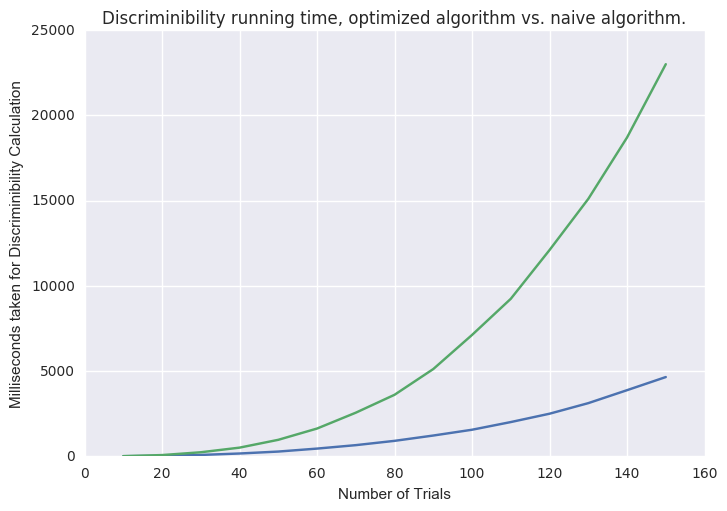

In [97]:
plt.plot(trials, opti, label='Optimized Algorithm')
plt.plot(trials, naive, label='Naive Algorithm')
plt.xlabel('Number of Trials')
plt.ylabel('Milliseconds taken for Discriminibility Calculation')
plt.title('Discriminibility running time, optimized algorithm vs. naive algorithm.')
plt.show()

### Experiment 4 - (same as experiment 3, but with n=150 trials)

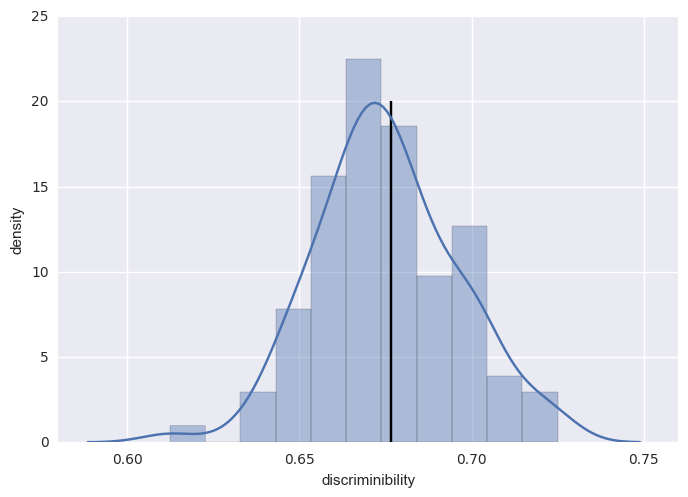

In [105]:
n = 150
results = []
for i in range(100):
    d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
    subjects = np.array(['A'] * n + ['B'] * n)
    disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    results.append(disc)
sns.distplot(results)
plt.vlines(ans, 0, 20)
plt.xlabel('discriminibility')
plt.ylabel('density')
plt.show()